In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
# All columns without 891 need to be cleaned. Let's take them one-by-one.  First though, only for the cleaning,
# let's join the train and test DataFrames because both need to be cleaned.  Afterward, we'll split them up again.

test["Survived"] = 2 # dummy value to use to split after cleaning
df = train.merge(test,how='outer')

print df.shape
print train.shape
print test.shape
len(df[df.Survived!=2])

(1309, 12)
(891, 12)
(418, 12)


891

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Now, maybe title matters (certainly more than the entire name). Add column with title and delete name
df["Title"] = [x.split()[1] for x in df.Name]
df["Title"].value_counts()

Mr.             736
Miss.           256
Mrs.            191
Master.          59
Dr.               8
y                 8
Rev.              8
Col.              4
Planke,           4
Billiard,         3
Impe,             3
Messemaeker,      2
Carlo,            2
Gordon,           2
Mlle.             2
Ms.               2
Major.            2
Capt.             1
Pelsmaeker,       1
Don.              1
Mulder,           1
the               1
Khalil,           1
der               1
Velde,            1
Jonkheer.         1
Walle,            1
Melkebeke,        1
Steen,            1
Palmquist,        1
Mme.              1
Brito,            1
Cruyssen,         1
Shawah,           1
Name: Title, dtype: int64

In [7]:
# what's with y?  Let's check.
df[df.Title=="y"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
307,308,1,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.0,1,0,PC 17758,108.9000,C65,C,y
505,506,0,1,"Penasco y Castellana, Mr. Victor de Satode",male,18.0,1,0,PC 17758,108.9000,C65,C,y
547,548,1,2,"Padro y Manent, Mr. Julian",male,NaN,0,0,SC/PARIS 2146,13.8625,NaN,C,y
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C,y
964,965,2,1,"Ovies y Rodriguez, Mr. Servando",male,28.5,0,0,PC 17562,27.7208,D43,C,y
1111,1112,2,2,"Duran y More, Miss. Florentina",female,30.0,1,0,SC/PARIS 2148,13.8583,NaN,C,y
1260,1261,2,2,"Pallas y Castello, Mr. Emilio",male,29.0,0,0,SC/PARIS 2147,13.8583,NaN,C,y
1305,1306,2,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,y


In [8]:
# Ah, let's change those.
def changeYs(row):
    if row.Title == "y":
        temp = row.Name.split()[3]
        if temp == "Dona.":
            return "Rich"
        else:
            return temp
    else:
        return row.Title
df["Title"] = df.apply(changeYs,axis=1)

In [9]:
vc = df.Title.value_counts()
idx=vc[vc<=4].index # rare
df["RareTitle"] = df.Title.apply(lambda x: x in idx)
df[df.RareTitle==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,RareTitle
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S,"Planke,",True
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,Don.,True
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,NaN,S,"Planke,",True
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S,"Billiard,",True
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S,der,True
200,201,0,3,"Vande Walle, Mr. Nestor Cyriel",male,28.0,0,0,345770,9.5000,NaN,S,"Walle,",True
282,283,0,3,"de Pelsmaeker, Mr. Alfons",male,16.0,0,0,345778,9.5000,NaN,S,"Pelsmaeker,",True
286,287,1,3,"de Mulder, Mr. Theodore",male,30.0,0,0,345774,9.5000,NaN,S,"Mulder,",True
333,334,0,3,"Vander Planke, Mr. Leo Edmondus",male,16.0,2,0,345764,18.0000,NaN,S,"Planke,",True
355,356,0,3,"Vanden Steen, Mr. Leo Peter",male,28.0,0,0,345783,9.5000,NaN,S,"Steen,",True


In [10]:
# Let's address the Vans and 'de's
def fixDutchNames(row):
    if not row.RareTitle:
        return row.Title
    else:
        if "van" in row.Name.lower().split()[0] or "de" in row.Name.lower().split()[0]:
            return row.Name.split()[2]
        else:
            return row.Title
def updateRare(row):
    if not row.RareTitle:
        return False
    else:
        if "van" in row.Name.lower().split()[0] or "de" in row.Name.lower().split()[0]:
            return False
        else:
            return True

df["Title"] = df.apply(fixDutchNames,axis=1)
df["RareTitle"] = df.apply(updateRare,axis=1)

In [11]:
df[df.RareTitle==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,RareTitle
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,Don.,True
369,370,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,B35,C,Mme.,True
443,444,1,2,"Reynaldo, Ms. Encarnacion",female,28.0,0,0,230434,13.0000,NaN,S,Ms.,True
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.5000,C104,S,Major.,True
536,537,0,1,"Butt, Major. Archibald Willingham",male,45.0,0,0,113050,26.5500,B38,S,Major.,True
556,557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6000,A16,C,"Gordon,",True
599,600,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,A20,C,"Gordon,",True
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.3000,B35,C,Mlle.,True
647,648,1,1,"Simonius-Blumer, Col. Oberst Alfons",male,56.0,0,0,13213,35.5000,A26,C,Col.,True
694,695,0,1,"Weir, Col. John",male,60.0,0,0,113800,26.5500,NaN,S,Col.,True


In [12]:
# Probably easier to just do the rest by hand
nameDict = {
30  : "Rich",
369 : "Mrs.",
443 : "Ms.",
449 : "Military",
536 : "Military",
556 : "Mrs.",
599 : "Mr.",
641 : "Ms.",
647 : "Military",
694 : "Military",
710 : "Ms.",
745 : "Military",
759 : "Mrs.",
798 : "Mr.",
822 : "Mr.",
910 : "Mrs.",
979 : "Ms.",
994 : "Mr.",
1022 : "Military",
1093 : "Military",
1305 : "Rich"
}
for i in nameDict.keys():
    df.at[i,"Title"] = nameDict[i]

In [13]:
df.Title.value_counts()

Mr.         758
Miss.       260
Mrs.        200
Master.      61
Dr.           8
Rev.          8
Military      7
Ms.           4
Rich          2
hoef,         1
Name: Title, dtype: int64

In [14]:
df[df.Title=="hoef,"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,RareTitle
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5,B19,S,"hoef,",False


In [15]:
df.at[170,"Title"]="Mr."

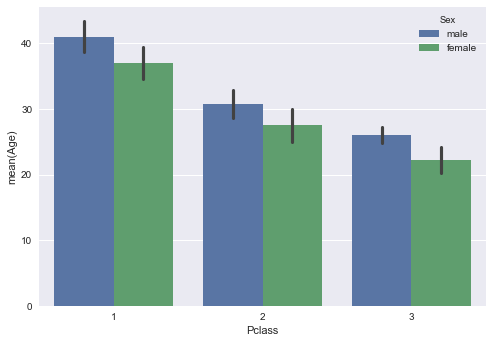

In [16]:
# Now let's take care of age

sns.barplot("Pclass","Age",data=df,hue="Sex")

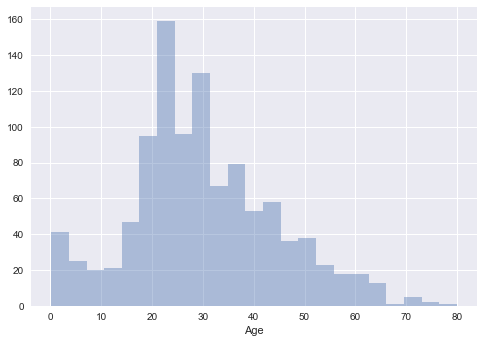

In [17]:
sns.distplot(df.Age[df.Age.notnull()],kde=False)

In [18]:
# Age is a function of Pclass and sex, so let's fill in missing age with mean_age(Pclass,sex,title)
meanDict = {}
for gender in ("male","female"):
    for title in df.Title.value_counts().index:
        for Pclass in (1,2,3):
            meanDict["%s %s %i"%(gender,title,Pclass)] = df[(df.Pclass==Pclass) & (df.Sex==gender) & (df.Title==title)]["Age"].mean()
meanDict

{'female Dr. 1': 49.0,
 'female Dr. 2': nan,
 'female Dr. 3': nan,
 'female Master. 1': nan,
 'female Master. 2': nan,
 'female Master. 3': nan,
 'female Military 1': nan,
 'female Military 2': nan,
 'female Military 3': nan,
 'female Miss. 1': 30.338983050847457,
 'female Miss. 2': 20.717083333333331,
 'female Miss. 3': 17.360873786407769,
 'female Mr. 1': nan,
 'female Mr. 2': nan,
 'female Mr. 3': nan,
 'female Mrs. 1': 42.857142857142854,
 'female Mrs. 2': 33.518518518518519,
 'female Mrs. 3': 32.326530612244895,
 'female Ms. 1': 24.0,
 'female Ms. 2': 28.0,
 'female Ms. 3': nan,
 'female Rev. 1': nan,
 'female Rev. 2': nan,
 'female Rev. 3': nan,
 'female Rich 1': 39.0,
 'female Rich 2': nan,
 'female Rich 3': nan,
 'male Dr. 1': 44.75,
 'male Dr. 2': 38.5,
 'male Dr. 3': nan,
 'male Master. 1': 6.984,
 'male Master. 2': 2.7572727272727273,
 'male Master. 3': 6.0899999999999999,
 'male Military 1': 54.714285714285715,
 'male Military 2': nan,
 'male Military 3': nan,
 'male Miss. 

In [19]:
# We need to choose a "mean" value for female Ms. 3
df[df.Title=="Ms."]#["Age"].plot(kind='hist')
meanDict["female Ms. 3"] = (24.+24.+28.)/3.

In [20]:
def fillAge(row):
    if np.isnan(row["Age"]):
        return meanDict["%s %s %i"%(row["Sex"],row["Title"],row["Pclass"])]
    else:
        return row["Age"]
df["Age"]=df.apply(fillAge,axis=1)

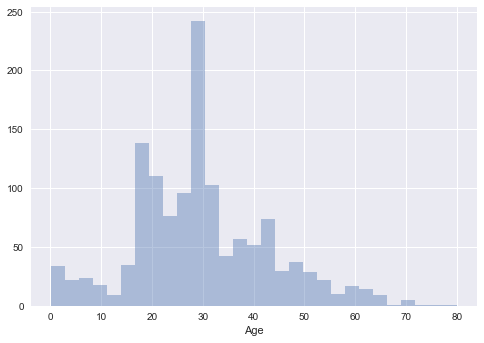

In [21]:
sns.distplot(df.Age,kde=False)

In [22]:
# OK, let's move onto fare:
# There's only one null value so let's just use the mean for the Pclass
print df[df.Fare.isnull()]["Pclass"]
fareMean = df[(df.Fare.notnull()) & (df.Pclass==3)]["Fare"].mean()
df.Fare.fillna(fareMean,inplace=True)

1043    3
Name: Pclass, dtype: int64


In [23]:
# OK, let's look at cabin
df.Cabin[df.Cabin.notnull()].head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [24]:
# Unfortunately we don't have this for all passengers, but the deck (first letter of cabin) is probably useful
df["Cabin"].fillna("FILLER",inplace=True)

def fillCabin(row):
    if row.Cabin!="FILLER":
        return row["Cabin"][0]
    else:
        return "FILLER"

df["Cabin"] = df.apply(fillCabin,axis=1)

In [25]:
# Now for embarked:
df["Embarked"].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [26]:
df["Embarked"].fillna("S",inplace=True)

In [27]:
df["familySize"]=df.Parch+df.SibSp
df.drop("Parch",axis=1,inplace=True)
df.drop("SibSp",axis=1,inplace=True)
df.drop("RareTitle",axis=1,inplace=True)
df.drop("Name",axis=1,inplace=True)

In [28]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,familySize
0,1,0,3,male,22.0,A/5 21171,7.2500,FILLER,S,Mr.,1
1,2,1,1,female,38.0,PC 17599,71.2833,C,C,Mrs.,1
2,3,1,3,female,26.0,STON/O2. 3101282,7.9250,FILLER,S,Miss.,0
3,4,1,1,female,35.0,113803,53.1000,C,S,Mrs.,1
4,5,0,3,male,35.0,373450,8.0500,FILLER,S,Mr.,0


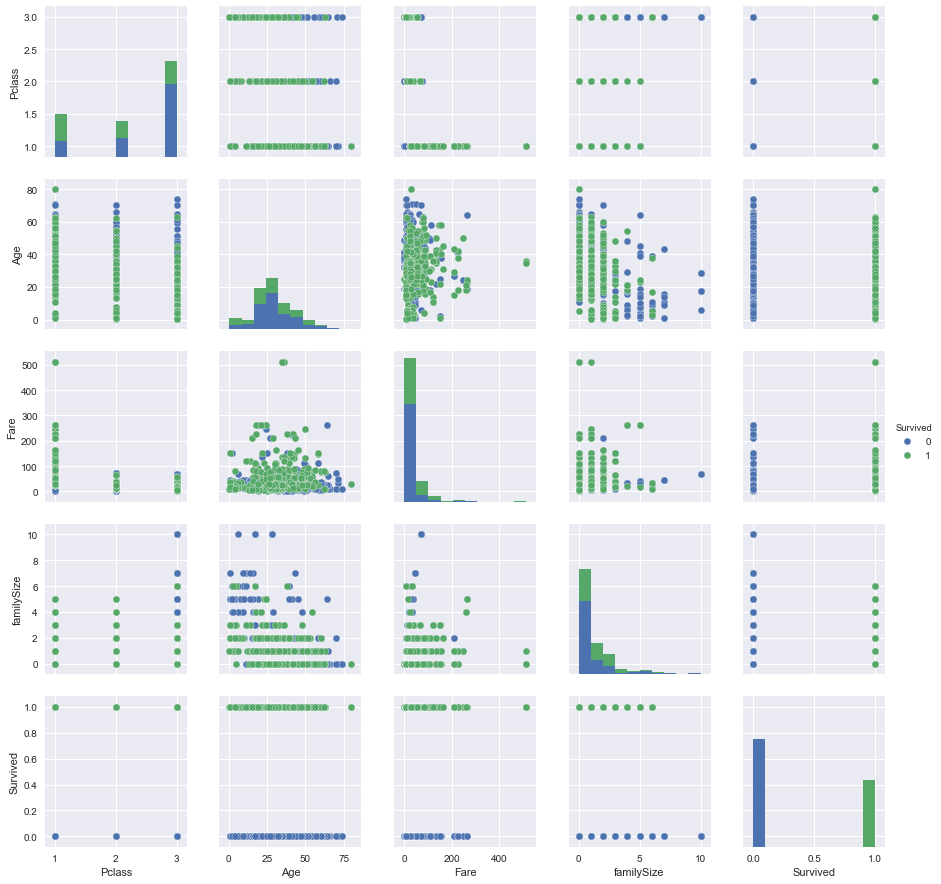

In [29]:
sns.pairplot(df[df.Survived!=2][["Pclass","Sex","Age","Fare","Cabin","familySize","Survived"]],hue="Survived")

In [30]:
df["FareGroup"] = pd.qcut(df.Fare,4,labels=["low","medLow","medHigh","High"])

In [31]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,familySize,FareGroup
0,1,0,3,male,22.0,A/5 21171,7.2500,FILLER,S,Mr.,1,low
1,2,1,1,female,38.0,PC 17599,71.2833,C,C,Mrs.,1,High
2,3,1,3,female,26.0,STON/O2. 3101282,7.9250,FILLER,S,Miss.,0,medLow
3,4,1,1,female,35.0,113803,53.1000,C,S,Mrs.,1,High
4,5,0,3,male,35.0,373450,8.0500,FILLER,S,Mr.,0,medLow


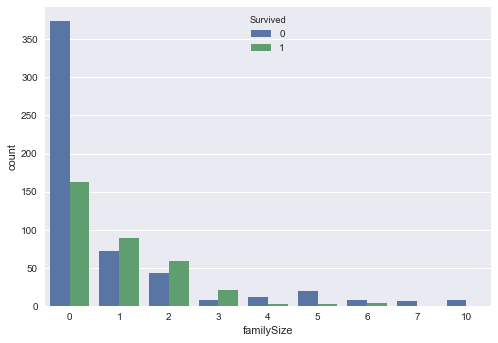

In [32]:
sns.countplot("familySize",data=df[df.Survived<2],hue="Survived")

In [33]:
def assignFamGroup(row):
    famSize = row.familySize
    if famSize ==0:
        return "Alone"
    elif famSize < 3:
        return "1-3"
    else:
        return "large"
df["FamGroup"] = df.apply(assignFamGroup,axis=1)

In [34]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,familySize,FareGroup,FamGroup
0,1,0,3,male,22.0,A/5 21171,7.2500,FILLER,S,Mr.,1,low,1-3
1,2,1,1,female,38.0,PC 17599,71.2833,C,C,Mrs.,1,High,1-3
2,3,1,3,female,26.0,STON/O2. 3101282,7.9250,FILLER,S,Miss.,0,medLow,Alone
3,4,1,1,female,35.0,113803,53.1000,C,S,Mrs.,1,High,1-3
4,5,0,3,male,35.0,373450,8.0500,FILLER,S,Mr.,0,medLow,Alone


In [35]:
# Maybe ticket header makes a difference.
def ticketHeader(row):
    ticket = row.Ticket
    s = ticket.split()
    if len(s) == 1:
        return "FILLER"
    else:
        return s[0]
df["TicketHeader"] = df.apply(ticketHeader,axis=1)

In [36]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,familySize,FareGroup,FamGroup,TicketHeader
0,1,0,3,male,22.0,A/5 21171,7.2500,FILLER,S,Mr.,1,low,1-3,A/5
1,2,1,1,female,38.0,PC 17599,71.2833,C,C,Mrs.,1,High,1-3,PC
2,3,1,3,female,26.0,STON/O2. 3101282,7.9250,FILLER,S,Miss.,0,medLow,Alone,STON/O2.
3,4,1,1,female,35.0,113803,53.1000,C,S,Mrs.,1,High,1-3,FILLER
4,5,0,3,male,35.0,373450,8.0500,FILLER,S,Mr.,0,medLow,Alone,FILLER


In [37]:
df["TicketHeader"].value_counts()

FILLER        961
PC             92
C.A.           46
SOTON/O.Q.     16
W./C.          14
STON/O         14
A/5            12
CA.            12
SC/PARIS       11
A/5.           10
CA             10
F.C.C.          9
C               8
SOTON/OQ        8
S.O.C.          7
S.O./P.P.       7
STON/O2.        7
A/4             6
SC/Paris        5
SC/AH           5
PP              4
A./5.           3
F.C.            3
S.C./PARIS      3
SOTON/O2        3
A.5.            3
A/4.            3
W.E.P.          2
WE/P            2
P/PP            2
SC              2
STON/OQ.        1
AQ/4            1
SC/A4           1
S.P.            1
S.C./A.4.       1
SW/PP           1
SO/C            1
S.O.P.          1
Fa              1
A4.             1
AQ/3.           1
S.W./PP         1
C.A./SOTON      1
LP              1
A.              1
A/S             1
SCO/W           1
SC/A.3          1
W/C             1
Name: TicketHeader, dtype: int64

In [38]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,familySize,FareGroup,FamGroup,TicketHeader
0,1,0,3,male,22.0,A/5 21171,7.2500,FILLER,S,Mr.,1,low,1-3,A/5
1,2,1,1,female,38.0,PC 17599,71.2833,C,C,Mrs.,1,High,1-3,PC
2,3,1,3,female,26.0,STON/O2. 3101282,7.9250,FILLER,S,Miss.,0,medLow,Alone,STON/O2.
3,4,1,1,female,35.0,113803,53.1000,C,S,Mrs.,1,High,1-3,FILLER
4,5,0,3,male,35.0,373450,8.0500,FILLER,S,Mr.,0,medLow,Alone,FILLER


In [39]:
# colsToTrain = ["Pclass","Sex","Age","Cabin","Embarked","Title","FareGroup","FamGroup","TicketHeader"]
colsToTrain = ["Pclass","Sex","Age","Cabin","Embarked","Title","FareGroup","FamGroup"]

trainX = df[df.Survived<2][colsToTrain].copy()
trainY = df[df.Survived<2]["Survived"].copy()
test = df[df.Survived==2].copy()

# print trainX.shape
# print test[colsToTrain].shape
trainX = pd.get_dummies(trainX)
testX = pd.get_dummies(test[colsToTrain].copy())

for col in trainX.columns:
    if col not in testX.columns:
        testX[col]=0
        
for col in testX.columns:
    if col not in trainX.columns:
        trainX[col]=0

print trainX.shape
print testX.shape
# print trainX.columns
# print testX.columns

(891, 32)
(418, 32)


In [40]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(trainX,trainY)

pred = clf.predict(testX)
test["Survived"] = pred
test[["PassengerId","Survived"]].to_csv("out3.csv",index=False)

In [41]:
from sklearn import svm
clf = svm.SVC()
clf.fit(trainX, trainY)
pred = clf.predict(testX)
test["Survived"] = pred
test[["PassengerId","Survived"]].to_csv("out3_svc.csv",index=False)

In [42]:
# To come: optimize ML Algo parameters!